In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import glob
from scipy import optimize
from scipy.special import erf
import os
import numpy.polynomial.polynomial as poly
from scipy.stats import chisquare
from collections import OrderedDict

from collections import OrderedDict
import matplotlib.patches as mpatches


In [2]:
##################################################################
# [Percent Xe, Efield, Pressure, Drift time, Sigma, Marker]
##################################################################
Data = np.load("XenonHelium.npy")
#Data = np.loadtxt("XenonHelium.txt")

In [3]:
vals = Data[:,:-1].astype(float)
mark = Data[:,-1]

In [4]:
Percents = np.unique(vals[:,0])
Percents

array([100.])

In [5]:
COL =['b','g','r','m','y','c','k','lime','orange','steelblue','pink','blue']


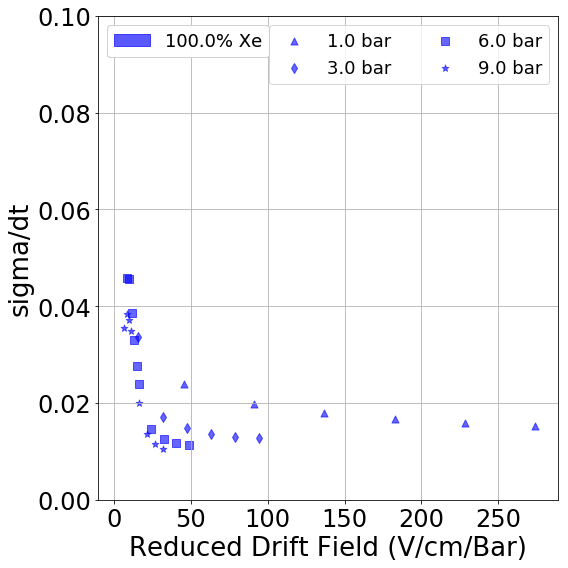

In [17]:
Pat = []
plt.figure(figsize=(8,8))
for x in range(0,len(Percents)):
#for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 141.28
    P = vals[:,2]
    E = vals[:,1]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)#**2
    V = d/(dt)
    
    V = sigma/(dt)
    R = E*.9767/P
    #Verr = V * np.sqrt((0.5/dt)**2+(0.1/(d))**2)
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #MBX,MBY,Yer,lab = MB_V(mm,x)
    #plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='r')
    #lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

    for x, y, m, L in zip(R, V, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=50,label=L+" bar") 
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=18)

#Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.ylim(0,0.1)#
#plt.xlim(0,100)#
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'sigma/dt',fontsize=26)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-VEL-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-VEL"+".pdf")
plt.show()

In [162]:
MB_Data = np.loadtxt("/Users/austinmcdonald/Desktop/Full-XeHe-No3.txt")
Fractions = np.unique(MB_Data[:,0])[1:]
Fractions = [100]
mm = dict()
this = MB_Data[:,0]
for y in range(0,len(Fractions)):
    hold = []
    for x in range(0,len(this)):
        if this[x] == Fractions[y]:
            hold.append(MB_Data[x])
    mm[y] = np.array(hold)
    
Fractions

[100]

In [163]:
def MB_V(data,x):
    Vz = data[x][:,5]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%Ar'
    X = E/P
    Y = Vz
    Yer =Vz*data[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab
    

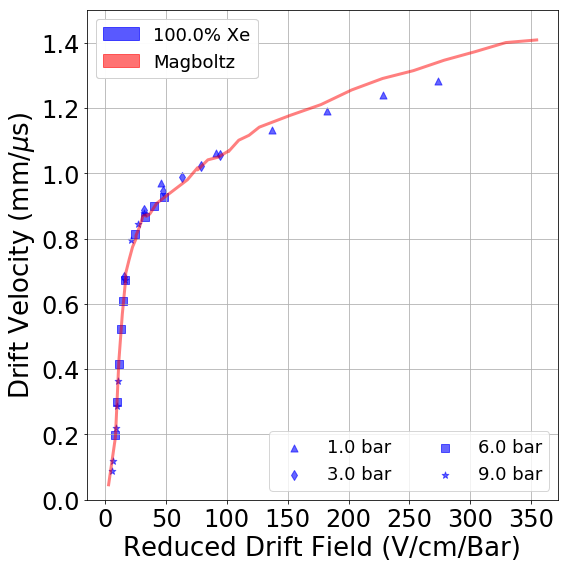

In [164]:
Pat = []
plt.figure(figsize=(8,8))
for x in range(0,len(Percents)):
#for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 141.28
    P = vals[:,2]
    E = vals[:,1]
    dt = vals[:,3]*1e6
    V = d/(dt)
    V = V
    R = E*.9767/P
    Verr = V * np.sqrt((0.5/dt)**2+(0.1/(d))**2)
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    MBX,MBY,Yer,lab = MB_V(mm,x)
    plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='r')
    lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

    for x, y, m, L in zip(R, V, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=50,label=L+" bar") 
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)

Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

#plt.scatter(XXX,YYY,color='lime')
#plt.plot(XX,YY,color='r')

#plt.xlim(0,250)#
#plt.xlim(0,50)

plt.ylim(0,1.5)#
#plt.xlim(0,100)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-VEL-zoom"+".pdf")
plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-VEL"+".pdf")
plt.show()

In [152]:
V

array([0.96857068, 1.0623239 , 1.13191525, 1.18909344, 1.23870105,
       1.2834382 , 0.68319398, 0.8879413 , 0.94576291, 0.98747689,
       1.02265272, 1.05448587, 0.19915835, 0.3002472 , 0.41516544,
       0.52196855, 0.60787659, 0.08872613, 0.11939607, 0.2183676 ,
       0.28733535, 0.36450991, 0.67333271, 0.79415572, 0.84595435,
       0.87696066])

In [165]:
def MB_D(data,x):
    Vz = data[x][:,9]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%Ar'
    X = E/P
    Y = Vz*P
    Yer =Vz*data[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

In [166]:
ydata = [1035.2102485, 2352.62259934, 2710.61508599, 2295.34380148, 1779.83462071, 1450.481533, 1207.04664208, 1135.44814476, 1135.44814476, 1063.84964743]
xdata = [6.99752923,  9.33435791, 11.77311679, 14.00254669, 16.2590174, 18.62893625, 23.30874851, 28.02007787, 32.62235471, 37.2778078]
yerr  = [93.07804653, 257.75459038, 300.71368878, 236.27504118, 171.83639359, 157.51669412, 121.71744546, 157.51669412, 157.51669412, 136.03714492]
xerr  = [0.70687367, 0.97042257, 1.18612329, 1.41450378, 1.58181425, 1.83216528, 2.29242718, 2.83052125, 3.20842505, 3.7093128]

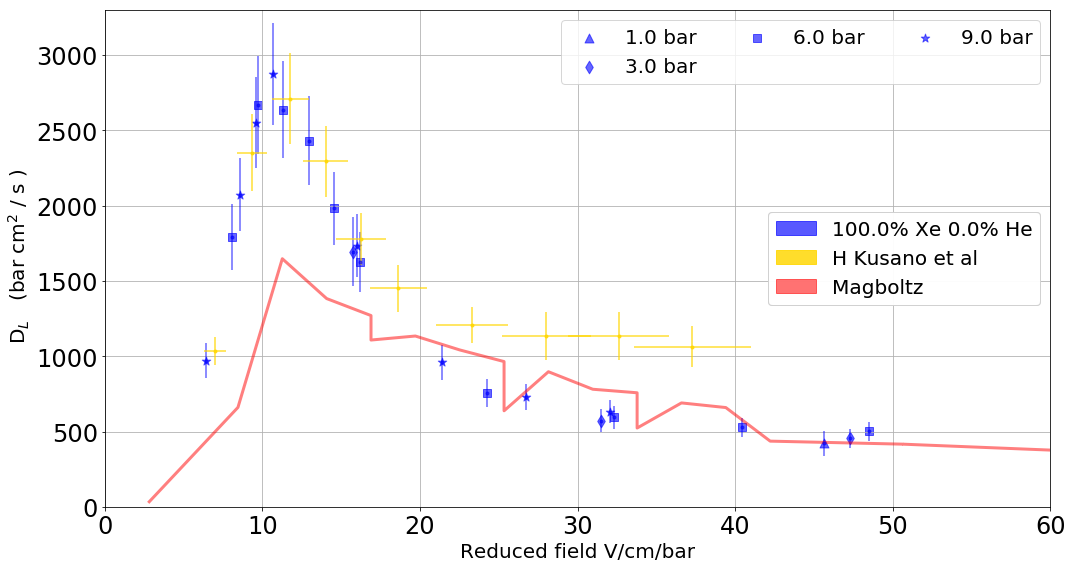

In [177]:
Pat = []
plt.figure(figsize=(15,8))
for x in range(0,len(Percents)):
#for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    
    V = d/(dt)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    
    B = (.01/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    plt.errorbar(R, Dslash,yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    
    MBX,MBY,Yer,lab = MB_D(mm,x)
    plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='r')
    lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

    for x, y, m, L in zip(R, Dslash, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

        
plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='gold',alpha=0.8)
lb1 = mpatches.Patch(color='gold', label='H Kusano et al',alpha=0.8)
#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=20)

Pat.append(lb1)
Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',ncol=1,fontsize=20)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,300)#
plt.xlim(0,60)
plt.ylim(0,3300)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$_L$   (bar cm$^2$ / s )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-diff-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-diff"+".pdf")
#plt.axvline(13)
plt.show()

In [172]:
np.where(Dslash==max(Dslash))

(array([22]),)

In [173]:
R[22]

5.3429978118161925

IndexError: index 3 is out of bounds for axis 0 with size 1

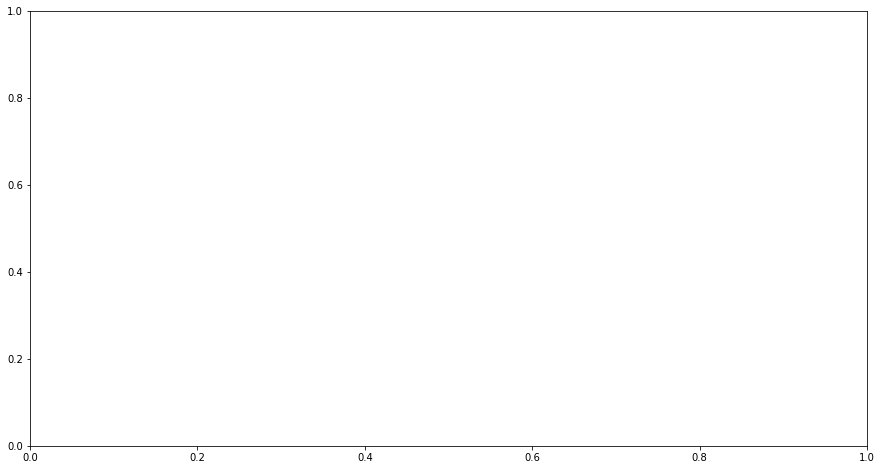

In [125]:
Pat = []
plt.figure(figsize=(15,8))
ax1 = plt.subplot(111)

#for x in range(0,len(Percents)):
for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 13.48
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    
    V = d/(dt)
    R = E/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    
    B = (.1/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    plt.errorbar(R, Dslash,yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    
    for x, y, m, L in zip(R, Dslash, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

        
plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='blue',alpha=0.8)
lb1 = mpatches.Patch(color='blue', label='H Kusano et al',alpha=0.8)
plt.plot(XX,YY,color='r',alpha=0.8)
lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.8)

#legend3=plt.legend(handles=[lb1,lb2],loc='upper center',ncol=5,fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=20)
Pat.append(lb1)
Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',ncol=1,fontsize=20)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
#plt.gca().add_artist(legend3)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
ax1.set_xlabel("Reduced field V/cm/bar",fontsize=20)
ax1.set_ylabel(r" D$_L$   (bar cm$^2$ / s )",fontsize=20)
plt.xlim(0,300)

ax2 = ax1.twiny()

# Decide the ticklabel position in the new x-axis,
# then convert them to the position in the old x-axis
N1 = 2.5e19
Td = 1e-17
N2 = P*N1
Townsend = (E/N2)/(Td)

newlabel = [0.0,0.05,0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]#[0,50,100,150,200,250,300] # labels of the xticklabels: the position in the new x-axis
k2degc = lambda t: (t*N1)*Td# convert function: from Kelvin to Degree Celsius
newpos   = [k2degc(t) for t in newlabel]   # position of the xticklabels in the old x-axis

ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel)

ax2.xaxis.set_tick_params(which='both',width=2,length=6)
#ax2.set_xscale("log", nonposx='clip')
#ax2.spines["bottom"].set_position(("axes", 0.1))
ax2.spines['bottom'].set_position(('outward', 60))# shift axis
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.set_xlabel('E/N Td',fontsize=20)
ax2.set_xlim(ax1.get_xlim())
plt.xticks(fontsize=20)

plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

In [ ]:
newlabel

In [235]:
newpos

[0.0, 0.0008, 0.0016, 0.0024, 0.0032, 0.003999999999999999, 0.0048]

In [209]:
N1 = 2.5e19
Td = 1e-17
N2 = P*N1
Townsend = (E/N2)/(Td)

In [219]:
Townsend

array([0.38461538, 0.57692308, 0.76923077, 0.96153846, 1.15384615,
       0.10561056, 0.1320132 , 0.1980198 , 0.2640264 , 0.330033  ,
       0.3960396 , 0.05289256, 0.0661157 , 0.09917355, 0.1322314 ,
       0.16528926, 0.19834711, 0.03551609, 0.04439512, 0.06659267,
       0.08879023, 0.11098779, 0.13318535])

In [202]:
newpos

[0.0,
 19.999999999999996,
 39.99999999999999,
 59.99999999999999,
 79.99999999999999,
 99.99999999999999,
 119.99999999999999]

(-5.0, 105.0)

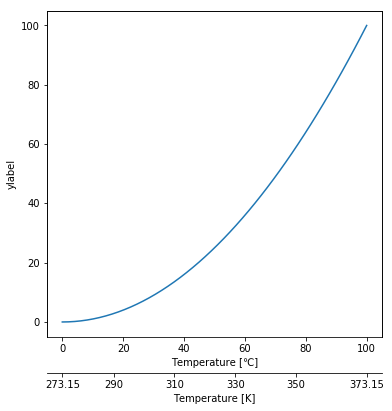

In [158]:
xx = np.linspace(0,100,50)
yy = (xx/10)**2
plt.figure(figsize=(6,6))
# Plot the data
ax1 = plt.subplot(111)
ax1.plot(xx,yy)
ax1.set_ylabel(r'ylabel')
ax1.set_xlabel(u'Temperature [\u2103]')

# Set scond x-axis
ax2 = ax1.twiny()

# Decide the ticklabel position in the new x-axis,
# then convert them to the position in the old x-axis
newlabel = [273.15,290,310,330,350,373.15] # labels of the xticklabels: the position in the new x-axis
k2degc = lambda t: t-273.15 # convert function: from Kelvin to Degree Celsius
newpos   = [k2degc(t) for t in newlabel]   # position of the xticklabels in the old x-axis

ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel)

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 36))
ax2.set_xlabel('Temperature [K]')
ax2.set_xlim(ax1.get_xlim())


In [132]:
DeltaD+Dslash*0.5

array([ 169.98622881,  148.15876431,  139.97203927,  126.80986601,
        121.72763782,  335.5351339 ,  278.70842401,  220.66566573,
        197.99595203,  194.1007718 ,  186.33197193, 1081.53145204,
        781.77013228,  373.90083242,  297.25766449,  269.32882724,
        256.05370187, 1139.48450494, 1185.42084295,  836.71896724,
        475.69005756,  376.61866826,  323.87421421])

In [105]:
np.sqrt(B)

array([0.05002662, 0.05032384, 0.05060442, 0.05095296, 0.05128446,
       0.02019962, 0.020496  , 0.02112674, 0.02173159, 0.02225681,
       0.0229348 , 0.0123675 , 0.01316296, 0.0144557 , 0.01539457,
       0.01616292, 0.01681802, 0.0095557 , 0.01003759, 0.01168567,
       0.01296476, 0.01407176, 0.01512994])

In [106]:
Dslash

array([ 283.8385101 ,  246.9683788 ,  232.90234162,  210.39648861,
        201.40987468,  623.42092524,  516.86710603,  407.11193465,
        363.27290456,  354.528348  ,  338.18630762, 2068.32957449,
       1493.09946543,  708.46828574,  558.08503503,  501.77939417,
        474.01720883, 2196.90748955, 2284.32769648, 1607.60679277,
        905.63223561,  709.03432229,  603.0000401 ])

In [122]:
XXX = np.array([  2.81481481,   8.44444444,  11.25925926,  14.07407407,
        16.88888889,  16.88888889,  19.7037037 ,  22.51851852,
        25.33333333,  25.33333333,  25.33333333,  28.14814815,
        30.96296296,  33.77777778,  33.77777778,  36.59259259,
        39.40740741,  42.22222222,  50.66666667,  50.66666667,
        67.55555556,  76.        ,  76.        ,  84.44444444,
        92.88888889, 101.33333333, 101.33333333, 109.77777778,
       118.22222222, 126.66666667, 152.        , 177.33333333,
       202.66666667, 228.        , 253.33333333, 278.66666667,
       304.        , 329.33333333, 354.66666667])

YYY = np.array([1208.06192218, 2622.65751253, 2782.95341178, 2206.5801764 ,
       1937.13155241, 1786.7293096 , 1755.76267449, 1640.18762347,
       1554.09864953, 1286.00538177, 1255.35170092, 1466.20069551,
       1340.51979375, 1317.31597365, 1097.89365663, 1255.98052266,
       1216.46309979,  980.49761083,  944.75521303,  944.75548585,
        839.0146336 ,  852.51141004,  857.82787085,  788.13940045,
        762.72931377,  767.01193198,  748.96443736,  739.68335622,
        723.59901912,  684.07559719,  645.78502241,  606.08680087,
        623.39578972,  618.5271399 ,  592.71763353,  572.45328186,
        556.26782759,  552.70947142,  540.25919839])

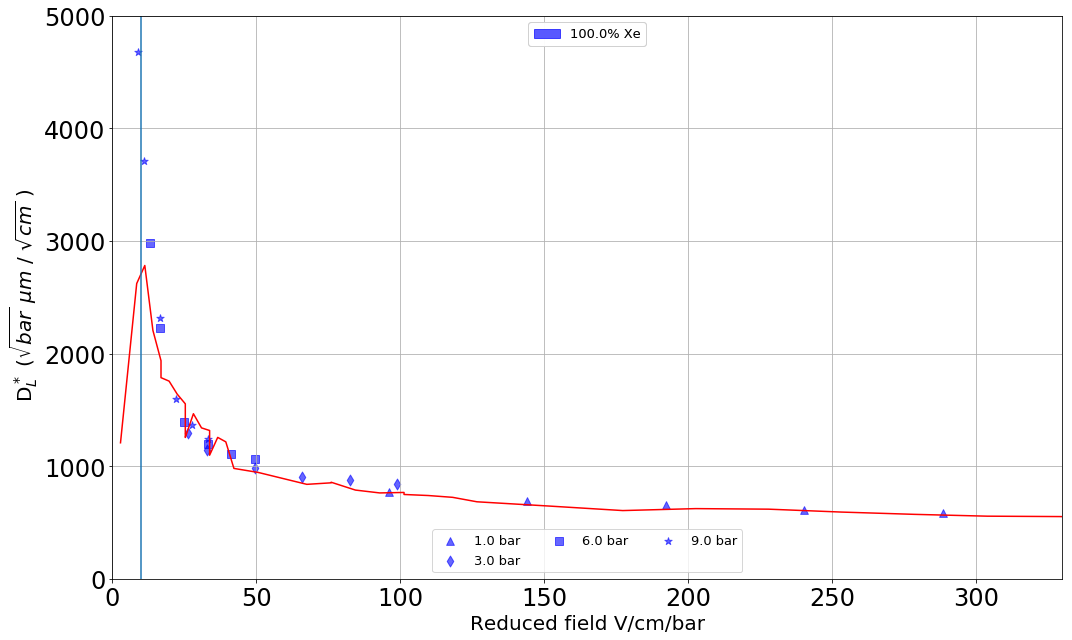

In [123]:
Pat = []
plt.figure(figsize=(15,9))
#for x in range(0,len(Percents)):
for x in [-1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    
    d =14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    sigma = sigma
    V = d/(dt)
    V = V
    R = E/P 
    
    A = sigma*V**2*P*1e6/d
    B = (0.05/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(2*P))**2
    DeltaD = np.sqrt((A)*(B))
    
    
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dstar  = np.sqrt(2*Dslash/V)*10
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.errorbar(R,Dstar,yerr=DeltaD*100,marker=None,lins)
    #plt.plot(R[SORT], Dstar[SORT], alpha=0.6,color=color)
    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60,label=L+" bar") 
    
plt.plot(XXX,YYY,color='r')  
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,330)#
#plt.xlim(0,50)

#plt.xlim(0,120)#
plt.ylim(0,5000)#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
plt.axvline(10)
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

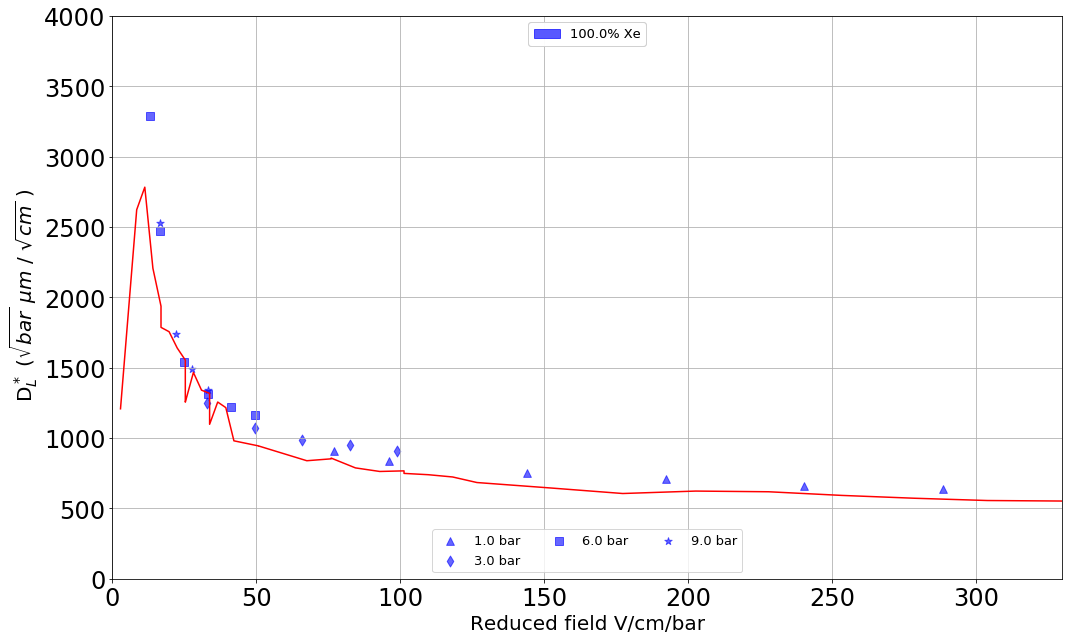

In [36]:
Pat = []
plt.figure(figsize=(15,9))
#for x in range(0,len(Percents)):
for x in [-1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 13.48
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2-0.0125
    sigma = sigma
    V = d/(dt)
    V = V*1.075
    R = E/P 
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dstar  = np.sqrt(2*Dslash/V)*10
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dstar[SORT], alpha=0.6,color=color)
    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60,label=L+" bar") 
    
plt.plot(XXX,YYY,color='r')  
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,330)#
#plt.xlim(0,50)

#plt.xlim(0,120)#
plt.ylim(0,4000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

In [64]:
P

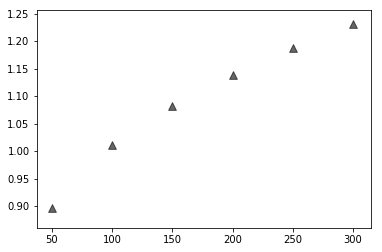

In [55]:
for Pc in [100]:
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 134.8
    V = d/(vals[:,3]*1e6)
    R = vals[:,1]/vals[:,2]
    
    #plt.scatter(R,V)
    
    for x, y, m in zip(R, V, mark):
        plt.scatter(x, y, alpha=0.6,marker=m,color='k',s=60) 
    
    

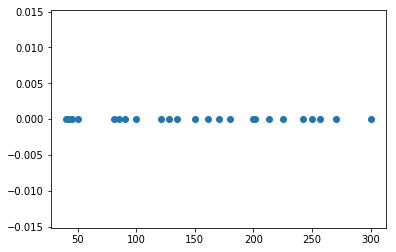

In [46]:
plt.scatter(vals[:,1]/vals[:,2],vals[:,4])

In [23]:
Data[Data[:,0]==80]

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array([], shape=(0, 24, 6), dtype='<U32')

In [14]:
Data[:,0]

array(['80', '80', '80', '80', '80', '80', '85', '85', '85', '85', '85',
       '85', '90', '90', '90', '90', '90', '90', '100', '100', '100',
       '100', '100', '100'], dtype='<U32')

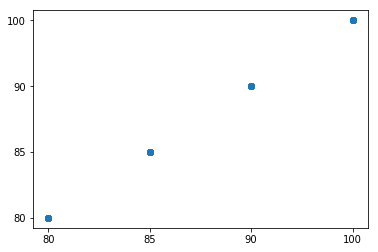

In [8]:
plt.scatter(Data[:,0],Data[:,0])